In [1]:
from read_data import *
from hyper import *
from alignment import *
from datasets.preprecossing import *

In [2]:
np.random.seed(1234)


/Users/dongjiajie/opt/anaconda3/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


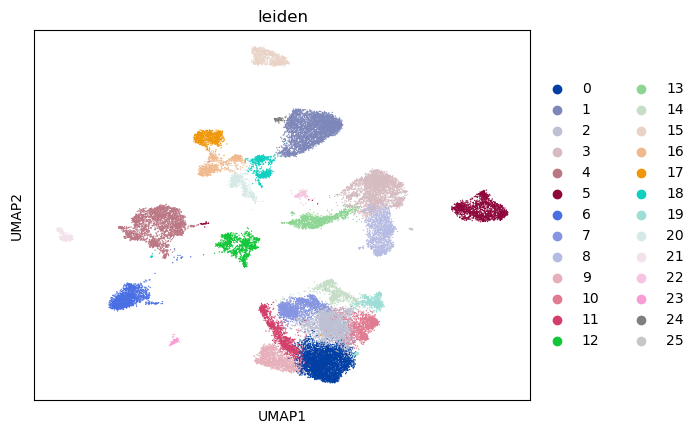

In [3]:
adata1 = sc.read("../../../capital/docs/tutorials/BRCA_EMTAB8107_expression_processed.h5ad")
adata2 = sc.read("../../../capital/docs/tutorials/BRCA_GSE114727_inDrop_expression_processed.h5ad") 
cell_type1 = pd.read_csv("../../../capital/docs/tutorials/BRCA_EMTAB8107_CellMetainfo_table.tsv",sep="\t")
cell_type2 = pd.read_csv("../../../capital/docs/tutorials/BRCA_GSE114727_inDrop_CellMetainfo_table.tsv",sep='\t');
adata1.obs.loc[list(cell_type1['Cell']), 'Celltype'] = list(cell_type1['Celltype (minor-lineage)'])
adata2.obs.loc[list(cell_type2['Cell']), 'Celltype'] = list(cell_type2['Celltype (minor-lineage)'])
adata1.obs['ori_leiden'] =  adata1.obs.leiden
# preprocessing()
sc.pl.umap(adata1, color="leiden")

In [4]:
adata1[adata1.obs["leiden"] != "12"]
adata1[adata1.obs.query("leiden != '12'").index]
adata1 = adata1[[r != "12" for r in adata1.obs.leiden]]

/Users/dongjiajie/opt/anaconda3/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


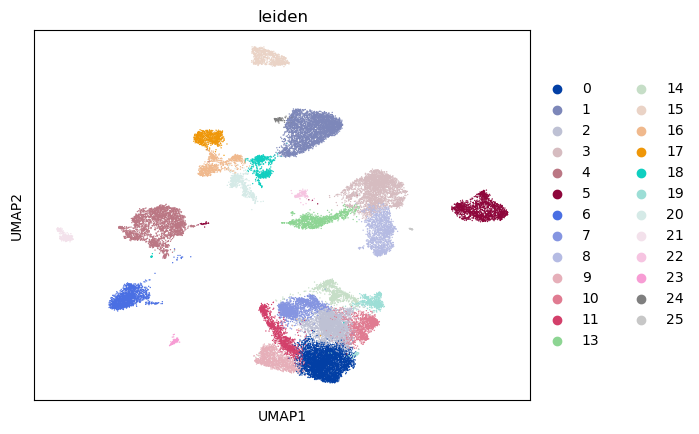

In [5]:
sc.pl.umap(adata1, color="leiden")

In [6]:
import random

random.seed (1234)

/Users/dongjiajie/Desktop/alignment/fyp/hyperalignment/code/datasets/preprecossing.py:166: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata.raw = adata
/Users/dongjiajie/opt/anaconda3/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


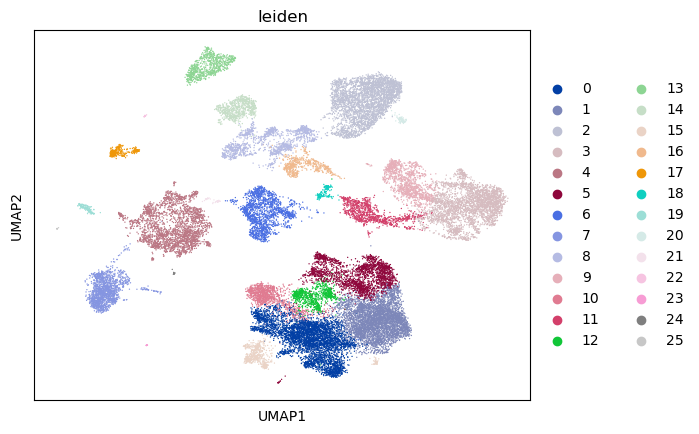

In [7]:
# preprocessing(adata1)
preprocessing_cluster(adata1)
sc.pl.umap(adata1, color="leiden")

In [13]:
adata1.obs

,orig.ident,nCount_RNA,nFeature_RNA,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,n_genes,leiden,Celltype,ori_leiden
sc5rJUQ024_AAACCTGGTCTCCACT,0,1534.403909,585,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,585,19,B,23
sc5rJUQ024_AAAGATGCAGCGAACA,0,2269.237834,1501,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,1501,7,B,6
sc5rJUQ024_AACCATGTCCTAGTGA,0,2534.055450,1732,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,1732,7,B,6
sc5rJUQ024_AACTCAGGTGTGACCC,0,2401.293173,1269,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,1269,7,B,6
sc5rJUQ024_AAGACCTGTCCGTGAC,0,2077.170442,1067,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,1067,7,B,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sc5rJUQ060_TGAGAGGAGTCCTCCT,12,1457.870548,538,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,538,7,Tprolif,6
sc5rJUQ060_TGCCCTACAACGCACC,12,2178.792422,1066,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,1066,5,Tprolif,9
sc5rJUQ060_TGTTCCGAGAGCCCAA,12,3166.109511,3547,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,3547,0,Tprolif,7
sc5rJUQ064_AGTTGGTGTGCAGACA,13,3325.207036,3207,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,3207,17,Tprolif,21


In [ ]:
adata1.obs[adata1.obs['Celltype']=='Plasma'].groupby('leiden').count()

In [9]:
set_initial_condition(adata1)
set_initial_condition(adata2)

In [10]:
adata1.uns.pop("log1p")
adata2.uns.pop("log1p")


{}

In [14]:
gene_list = sort_data(adata1,adata2,N_1=1998)


/Users/dongjiajie/opt/anaconda3/lib/python3.8/site-packages/scanpy/preprocessing/_highly_variable_genes.py:208: RuntimeWarning: invalid value encountered in log
  dispersion = np.log(dispersion)
/Users/dongjiajie/opt/anaconda3/lib/python3.8/site-packages/anndata/_core/raw.py:139: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return anndata.AnnData(


513 genes are used to calculate cost of tree alignment.



In [15]:
adata1.uns["capital"]["intersection_genes"] = np.array(
    gene_list, dtype=object)
adata2.uns["capital"]["intersection_genes"] = np.array(
    gene_list, dtype=object)

In [16]:
datas1 = calculate_cluster_centroid_for_genes(adata1,gene_list,save_path = "./datas/del_data1/")


./datas/del_data1/datas.data length:26
Generating all pairs superset


100%|██████████| 1563/1563 [01:01<00:00, 25.30ex/s, loss=1.397479] 


	 Epoch 9 | average train loss: 1.408873
Optimization finished.


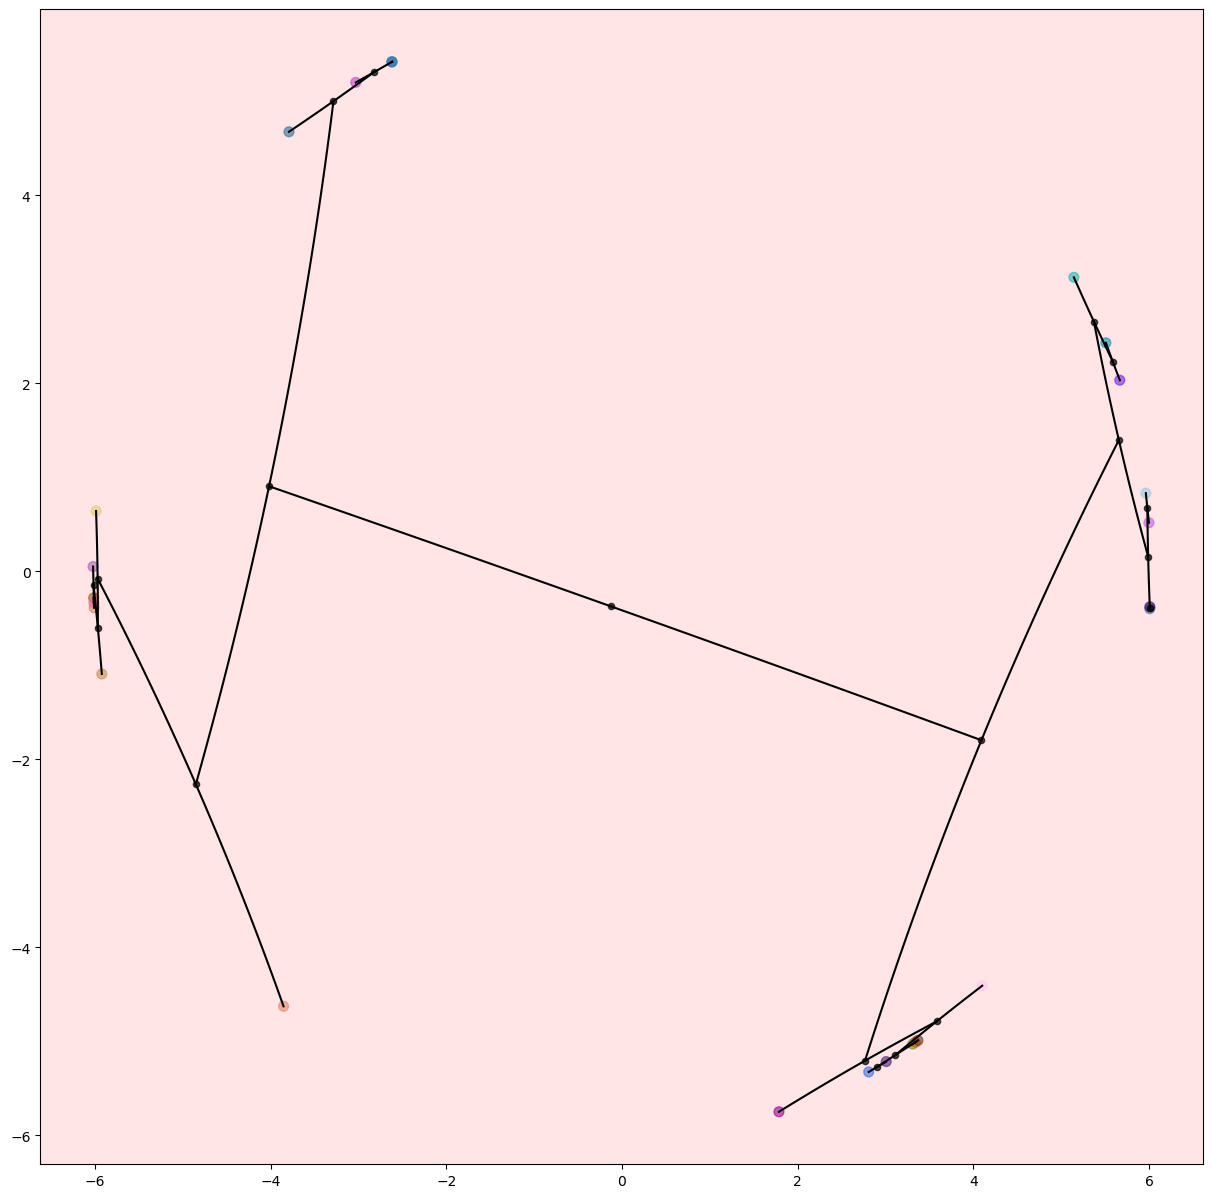

In [17]:
get_Hyper_tree('./datas/del_data1/datas.data',1,len(gene_list)+1,0,10,save_path="./datas/del_data1/",c=0.5)

In [18]:
show_the_tree("./datas/del_data1/")

In [21]:
adata1.obs[adata1.obs['Celltype']=='Fibroblasts'].groupby('leiden').count()

,orig.ident,nCount_RNA,nFeature_RNA,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,n_genes,Celltype,ori_leiden
leiden,,,,,,,,,,,,,,,,
0,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
1,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2921,2921,2921,2921,2921,2921,2921,2921,2921,2921,2921,2921,2921,2921,2921,2921
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16
6,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
7,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
8,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [22]:
adata1.obs[adata1.obs['Celltype']=='CD8Tex'].groupby('leiden').count()

,orig.ident,nCount_RNA,nFeature_RNA,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,n_genes,Celltype,ori_leiden
leiden,,,,,,,,,,,,,,,,
0,2143,2143,2143,2143,2143,2143,2143,2143,2143,2143,2143,2143,2143,2143,2143,2143
1,718,718,718,718,718,718,718,718,718,718,718,718,718,718,718,718
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
5,1065,1065,1065,1065,1065,1065,1065,1065,1065,1065,1065,1065,1065,1065,1065,1065
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [23]:
adata1.obs[adata1.obs['Celltype']=='CD8Tcm'].groupby('leiden').count()

,orig.ident,nCount_RNA,nFeature_RNA,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,n_genes,Celltype,ori_leiden
leiden,,,,,,,,,,,,,,,,
0,2144,2144,2144,2144,2144,2144,2144,2144,2144,2144,2144,2144,2144,2144,2144,2144
1,3637,3637,3637,3637,3637,3637,3637,3637,3637,3637,3637,3637,3637,3637,3637,3637
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
5,925,925,925,925,925,925,925,925,925,925,925,925,925,925,925,925
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22
8,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5


In [28]:
adata1.obs[adata1.obs['leiden']=='9'].groupby('Celltype').count()

,orig.ident,nCount_RNA,nFeature_RNA,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,n_genes,leiden,ori_leiden
Celltype,,,,,,,,,,,,,,,,
B,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
CD8Tcm,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
CD8Tex,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Endothelial,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Fibroblasts,1224,1224,1224,1224,1224,1224,1224,1224,1224,1224,1224,1224,1224,1224,1224,1224
M1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Malignant,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Mast,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Myofibroblasts,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3


In [29]:
adata1.obs[adata1.obs['leiden']=='10'].groupby('Celltype').count()

,orig.ident,nCount_RNA,nFeature_RNA,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,n_genes,leiden,ori_leiden
Celltype,,,,,,,,,,,,,,,,
B,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
CD8Tcm,273,273,273,273,273,273,273,273,273,273,273,273,273,273,273,273
CD8Tex,702,702,702,702,702,702,702,702,702,702,702,702,702,702,702,702
Endothelial,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Fibroblasts,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
M1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
Malignant,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
Mast,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
Myofibroblasts,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [31]:
adata1.obs[adata1.obs['ori_leiden']=='8'].groupby('leiden').count()

,orig.ident,nCount_RNA,nFeature_RNA,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,n_genes,Celltype,ori_leiden
leiden,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,198,198,198,198,198,198,198,198,198,198,198,198,198,198,198,198
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [32]:
adata1.obs[adata1.obs['ori_leiden']=='10'].groupby('leiden').count()

,orig.ident,nCount_RNA,nFeature_RNA,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,n_genes,Celltype,ori_leiden
leiden,,,,,,,,,,,,,,,,
0,1163,1163,1163,1163,1163,1163,1163,1163,1163,1163,1163,1163,1163,1163,1163,1163
1,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
